In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from bokeh.plotting import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import curdoc
from bokeh.layouts import widgetbox, row, column
from bokeh.models import Slider, Select, ColumnDataSource, CategoricalColorMapper, CustomJS
from bokeh.plotting import figure, show
from bokeh.palettes import viridis
from bokeh.models import Slider

In [3]:
#Importing and processing data file
crop = pd.read_csv('C:\\Users\\mdkum\\OneDrive\\Documents\\Data Science\\Dataset\\data.world\\crop_production.csv')
#crop_tn = pd.read_csv('C:\\Users\\mdkum\\OneDrive\\Documents\\Data Science\\Dataset\\data.world\\crop_production_tn.csv')

In [4]:
#Cleaning Data
crop.fillna(np.NaN)
crop['Season'] = crop.Season.str.strip() #Removing Whitespace

In [5]:
#Filtering the dataset by Season
crop_season = crop[(crop.Season == 'Whole Year') & (crop.Crop!='Coconut ') & (crop.Crop !='Pulses total') & (crop.Crop !='Total foodgrain')]
#crop_season = crop_season[crop_season.Crop != 'Coconut ']
crop_crop = crop_season.groupby(['Crop', 'Crop_Year']).mean().round(1)
crop_year = crop_season.groupby(['Crop_Year']).Area.mean().round(1)
crop_tn = crop_season[crop_season.State_Name=='Tamil Nadu']
#crop_crop = crop_season.groupby(['State_Name', 'Crop', 'Crop_Year']).sum().round(1)


Text(0,0.5,'count')

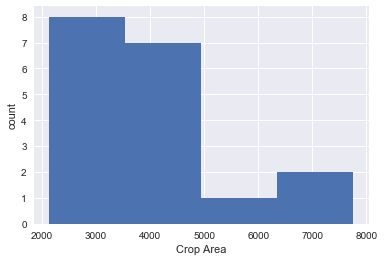

In [6]:
#Plotting a Histogram
sns.set()
n_bins = int(np.sqrt(len(crop_year)))
plt.hist(crop_year, bins=n_bins)
plt.xlabel('Crop Area')
plt.ylabel('count')

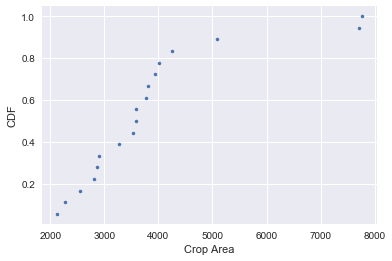

In [7]:
#Computing ECDF for a one-dimensional array 
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x, y = ecdf(crop_year)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Crop Area')
plt.ylabel('CDF')
plt.show()

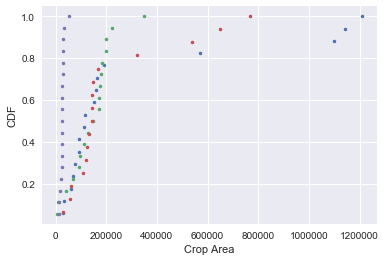

In [55]:
##Computing ECDF
x_tn, y_tn = ecdf(crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production)
x_kr, y_kr = ecdf(crop_yr[crop_yr.index.get_level_values('State_Name')=='Karnataka'].Production)
x_ap, y_ap = ecdf(crop_yr[crop_yr.index.get_level_values('State_Name')=='Andhra Pradesh'].Production)
x_kl, y_kl = ecdf(crop_yr[crop_yr.index.get_level_values('State_Name')=='Kerala'].Production)
plt.plot(x_tn, y_tn, marker='.', linestyle='none')
plt.plot(x_kr, y_kr, marker='.', linestyle='none')
plt.plot(x_ap, y_ap, marker='.', linestyle='none')
plt.plot(x_kl, y_kl, marker='.', linestyle='none')
plt.xlabel('Crop Area')
plt.ylabel('CDF')
plt.show()

[  30140.48   76115.8   117254.5   192195.2  1181466.18]
[ 40746.025  116641.2    142594.35   206860.875  722567.3125]
[14257.26  24977.175 26299.55  27992.625 45042.95 ]
[  7939.215   93527.625  160552.05   181215.6    294156.5075]


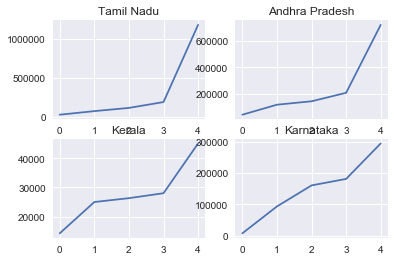

In [97]:
#Computing Percentiles
n=1
for state in ['Tamil Nadu', 'Andhra Pradesh', 'Kerala', 'Karnataka']:
    ptile = np.percentile(crop_yr[crop_yr.index.get_level_values('State_Name')==state].Production, percentiles)
    print(ptile)
    plt.subplot(2,2,n)
    n=n+1
    plt.plot(ptile)
    plt.title(state)
plt.style.use('ggplot')

In [63]:
#Co-variance Matrix
area = crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Area
production = crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production
covariance_matrix = np.cov(area, production)
print(covariance_matrix)

[[1.30325156e+07 1.43373928e+09]
 [1.43373928e+09 1.73175447e+11]]


In [66]:
#Pearson Correlation Coeffecient
corr_mat = np.corrcoef(area, production)
print(corr_mat)

[[1.         0.95436147]
 [0.95436147 1.        ]]


In [71]:
np.var(production)
np.std(production)

403718.5355260337

C:\Users\mdkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


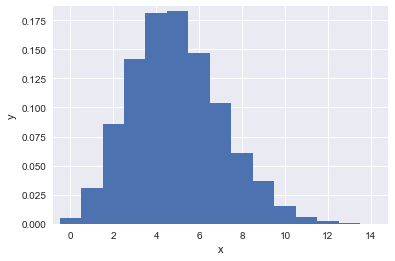

In [73]:
# Seed random number generator
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute bin edges: bins
bins = np.arange(min(n_defaults), max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)

# Set margins
_ = plt.margins(0.02)

# Label axes
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

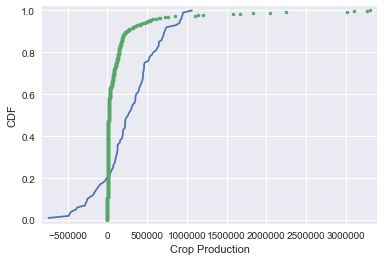

In [78]:
# Seed random number generator
np.random.seed(42)
# Compute mean and standard deviation: mu, sigma
mu = np.mean(crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production)
sigma = np.std(crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 100)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(crop_yr.Production)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Crop Production')
_ = plt.ylabel('CDF')
plt.show()

In [74]:
crop_yr = crop_season.groupby(['State_Name', 'Crop_Year']).mean().round(1)
crop_yr.size

848

In [ ]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

In [92]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production)
sigma = np.std(crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production)

# Seed random number generator
np.random.seed(42)

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = len(samples[np.where(samples >= mu)]) / len(samples)

# Print the result
print('Probability of besting production:', prob)

Probability of besting production: 0.499606


In [86]:
crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production

State_Name  Crop_Year
Tamil Nadu  1997          569867.4
            1998          192195.2
            1999          163135.2
            2000          161211.9
            2001         1207959.3
            2002           33695.9
            2003           27770.2
            2004          117254.5
            2005          151179.3
            2006           92712.1
            2007           76115.8
            2008           67288.4
            2009           60221.3
            2010         1141726.5
            2011           92746.4
            2012         1097228.9
            2013          111031.5
Name: Production, dtype: float64

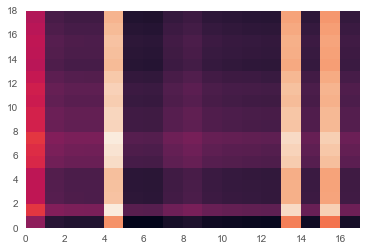

In [105]:
# Generate two 1-D arrays: u, v
u = crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production
v = crop_yr[crop_yr.index.get_level_values('State_Name')=='Karnataka'].Production


# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u, v)

# Compute Z based on X and Y
Z = X-Y 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()

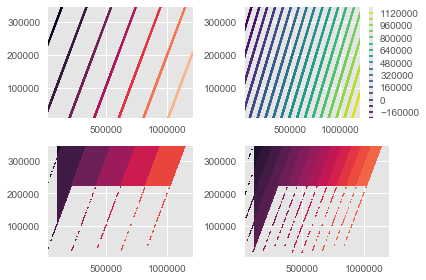

In [107]:
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X, Y, Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X, Y, Z, 20, cmap='viridis')
plt.colorbar()

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X, Y, Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

Text(0.5,1,'hexbin() plot')

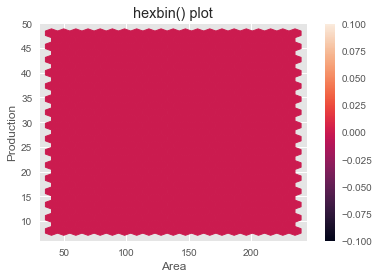

In [114]:
a = crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Area
p = crop_yr[crop_yr.index.get_level_values('State_Name')=='Tamil Nadu'].Production
plt.hexbin(a,p,gridsize=(15,12),extent=(40, 235, 8, 48))
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('hexbin() plot')

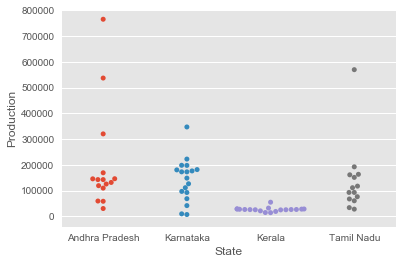

In [132]:
crop_yr = crop_season[crop_season.State_Name.isin(['Tamil Nadu', 'Andhra Pradesh', 'Kerala', 'Karnataka'])].groupby(['State_Name', 'Crop_Year']).mean().round(1)
crop_yr = crop_yr[(crop_yr.Area < 175000) & (crop_yr.Production < 1000000)]
x_val = crop_yr.index.get_level_values('State_Name')
_ = sns.swarmplot(x=x_val, y='Production', data=crop_yr)
_=plt.xlabel('State')
_=plt.ylabel('Production')
plt.show()

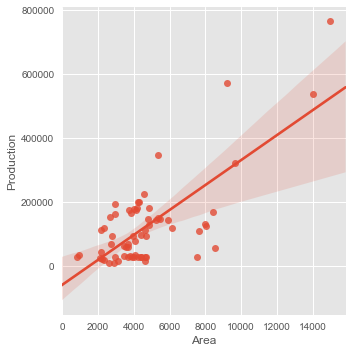

In [133]:
#Simple linear regressions

sns.lmplot(data=crop_yr, x='Area', y='Production')
plt.show()

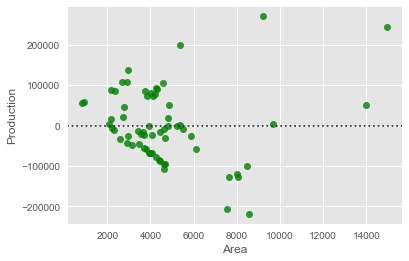

In [134]:
#Plotting residuals of a regression
sns.residplot(x='Area', y='Production', data=crop_yr, color='green')
plt.show()

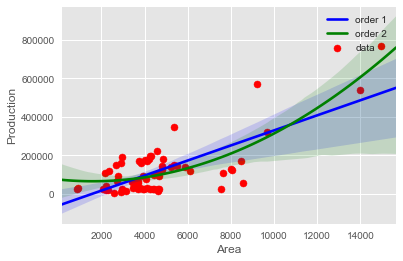

In [135]:
#High Order Regression

# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(crop_yr['Area'], crop_yr['Production'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='Area', y='Production', data=crop_yr, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='Area', y='Production', data=crop_yr, scatter=None, order=2, color='green', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

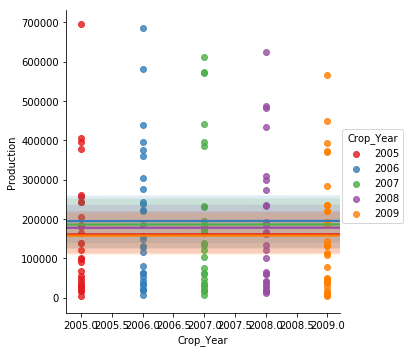

In [6]:
crop_tn_Coco = crop_season[(crop_season.State_Name=='Tamil Nadu') & (crop_season.Crop=='Banana') & (crop_season.Crop_Year.isin([2005, 2006, 2007, 2008, 2009, 2010]))]
#state = crop_yr.index.get_level_values('State_Name').unique()
# Plot a linear regression 
sns.lmplot(x='Crop_Year', y='Production', data=crop_tn_Coco, hue='Crop_Year', palette='Set1')

# Display the plot
plt.show()

ValueError: low >= high

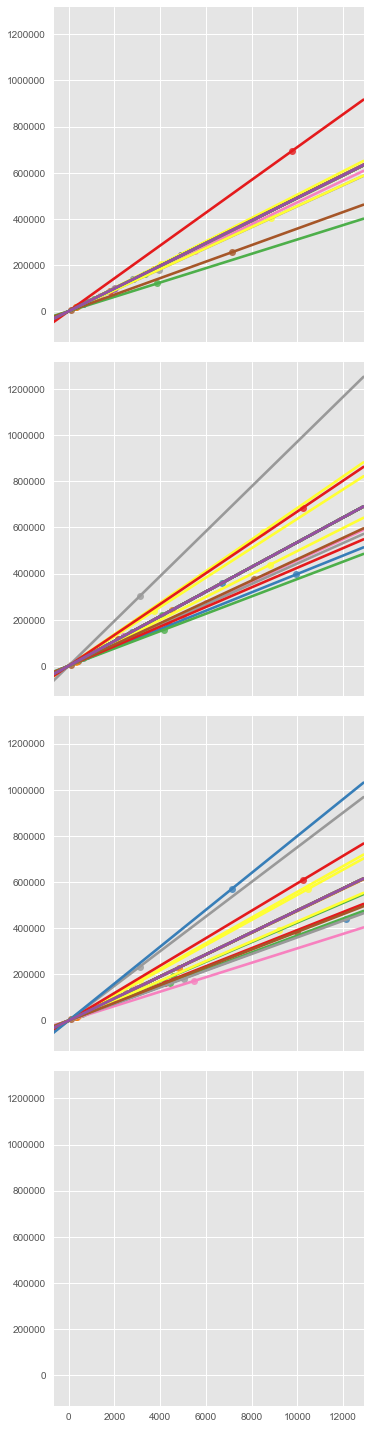

In [181]:
crop_tn_Coco = crop_season[(crop_season.State_Name=='Tamil Nadu') & (crop_season.Crop=='Banana') & (crop_season.Crop_Year.isin([2005, 2006, 2007, 2008])) ]
#& (crop_season.District_Name.isin(['COIMBATORE', 'CUDDALORE', 'KANCHIPURAM', 'TIRUNELVELI']))
#state = crop_yr.index.get_level_values('State_Name').unique()
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='Area', y='Production', data=crop_tn_Coco, hue='District_Name', row = 'Crop_Year', palette='Set1')

# Display the plot
plt.show()

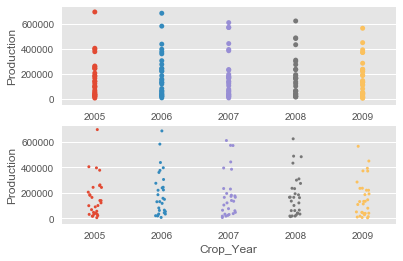

In [177]:
# Make a strip plot 
plt.subplot(2,1,1)
sns.stripplot(x='Crop_Year', y='Production', data=crop_tn_Coco)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='Crop_Year', y='Production', data=crop_tn_Coco, jitter=True, size=3)

# Display the plot
plt.show()

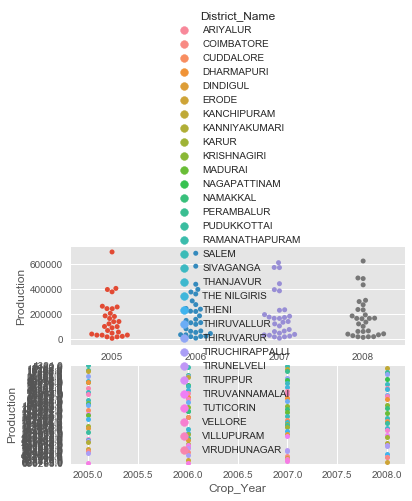

In [187]:
crop_tn_dist = crop_season[(crop_season.State_Name=='Tamil Nadu') & (crop_season.Crop=='Banana') & (crop_season.Crop_Year.isin([2005, 2006, 2007, 2008])) & (crop_season.District_Name.isin(['COIMBATORE', 'CUDDALORE', 'KANCHIPURAM', 'TIRUNELVELI']))]

    #constructing-swarm-plots
    # Make a strip plot of 'hp' grouped by 'cyl'
    plt.subplot(2,1,1)
    sns.swarmplot(x='Crop_Year', y='Production', data=crop_tn_Coco)

    # Make the strip plot again using jitter and a smaller point size
    plt.subplot(2,1,2)
    sns.swarmplot(x='Crop_Year', y='Production', data=crop_tn_Coco, hue='District_Name', orient='h')

    # Display the plot
    plt.show()

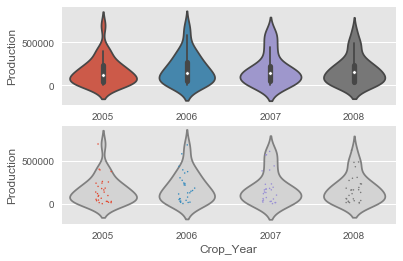

In [188]:
# Generate a violin plot 
plt.subplot(2,1,1)
sns.violinplot(x='Crop_Year', y='Production', data=crop_tn_Coco)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='Crop_Year', y='Production', data=crop_tn_Coco, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='Crop_Year', y='Production', data=crop_tn_Coco, size=1.5, jitter=True)

# Display the plot
plt.show()

C:\Users\mdkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mdkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


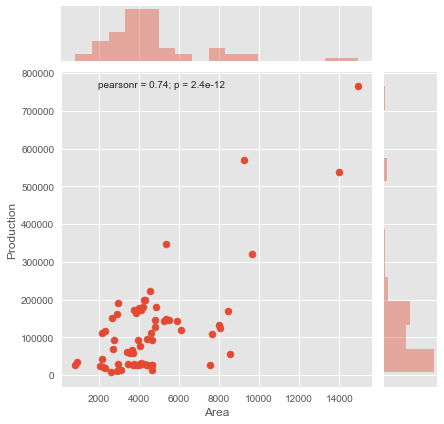

In [196]:
# Generate a joint plot 
sns.jointplot(x='Area', y='Production', data=crop_yr)

# Display the plot
plt.show()

C:\Users\mdkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mdkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


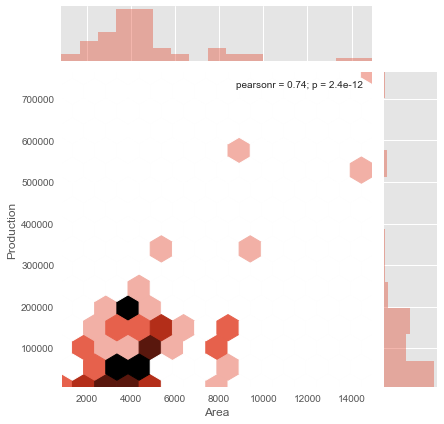

In [193]:
sns.jointplot(x='Area', y='Production', data=crop_yr, kind='hex')

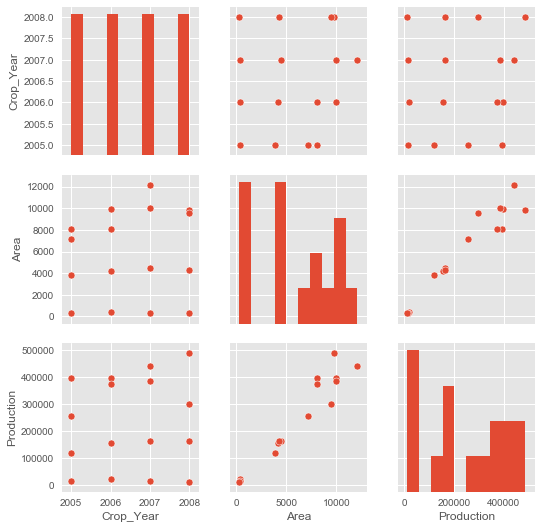

In [197]:
sns.pairplot(crop_tn_dist)

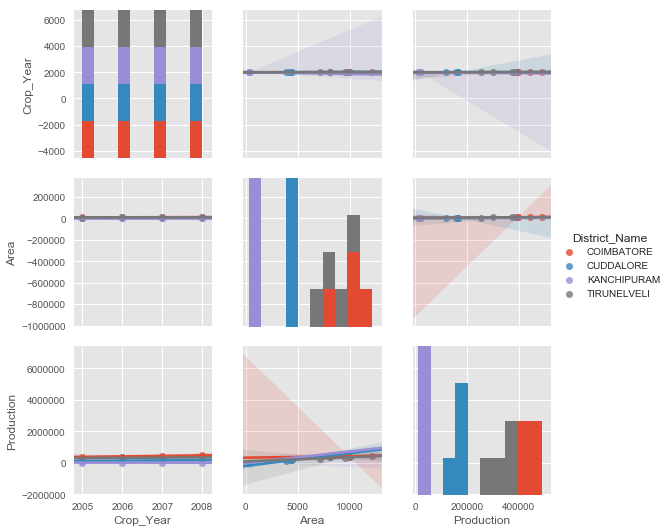

In [198]:
sns.pairplot(crop_tn_dist, hue='District_Name', kind='reg')